## Exercise meanshift
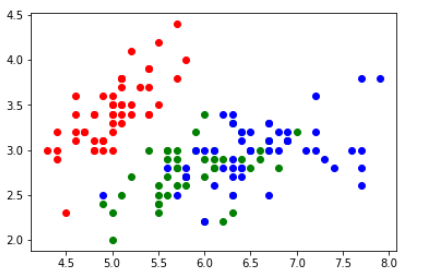

1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space

In [1]:
%pylab inline 
import pandas as pd

iris = pd.read_csv('../data/iris_data.csv', decimal=',')
df = pd.DataFrame(iris)
df.head()

Populating the interactive namespace from numpy and matplotlib


,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


In [2]:
df.drop(['Petal length', 'Petal width'], 'columns', inplace=True)
df.head()

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa


2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)

In [3]:
from sklearn import preprocessing
import numpy as np

# Convert species to 0, 1 or 2
label_enc =preprocessing.LabelEncoder()
df['Species'] = label_enc.fit_transform(df['Species'].astype(str))
df

,Sepal length,Sepal width,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


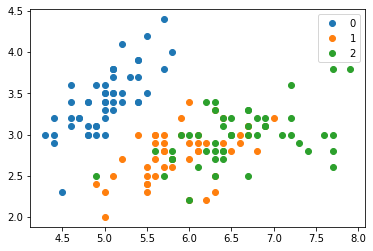

In [4]:
groups = df.groupby('Species')

for name, group in groups:
    plt.plot(group['Sepal length'], group['Sepal width'], marker='o', linestyle='', label=name)
plt.legend()

4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)

In [5]:
from sklearn.cluster import estimate_bandwidth
est_bw = estimate_bandwidth(df, quantile=0.21)
#est_bw = estimate_bandwidth(df, quantile=0.15)
est_bw

0.7719243364536355

In [6]:
from sklearn.cluster import MeanShift
analyzer = MeanShift(bandwidth=est_bw, bin_seeding=True) 
analyzer.fit(df)

MeanShift(bandwidth=0.7719243364536355, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)

In [7]:
labels = analyzer.labels_
cluster_centers = analyzer.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print(labels)
print('\n\n',labels_unique)
print('\n\n',cluster_centers)
print('\n\n',n_clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


 [0 1 2]


 [[4.95777778 3.39333333 0.        ]
 [5.9        2.775      1.        ]
 [6.45945946 2.98378378 2.        ]]


 3


In [8]:
#df['cluster_group'] = np.nan
#for i in range(len(df)):
#    df.iloc[i,df.columns.get_loc('cluster_group')] = labels[i] #set the cluster label on each row

#df

In [9]:
#Grouping passengers by Cluster
#df_data = df.groupby(['cluster_group']).mean()
#Count of passengers in each cluster
#df_data['Counts'] = pd.Series(df.groupby(['cluster_group']).size())
#df_data

5. create a new scatter plot where each flower is colored according to cluster label
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)

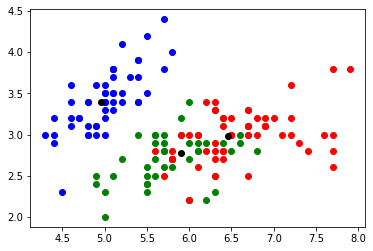

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for v, color in zip(range(len(cluster_centers)+1), 'bgrcmy'):
    mask=labels==v
    ax1.scatter(df[mask]['Sepal length'], df[mask]['Sepal width'], c=color)
ax1.scatter(cluster_centers[:,0], cluster_centers[:,1], c='black')

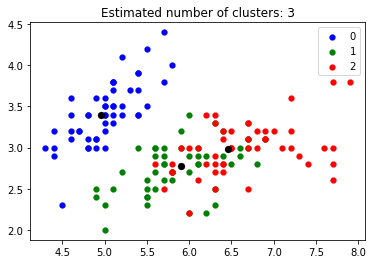

In [11]:
from itertools import cycle
from sklearn.datasets import make_blobs

data_2d = df.values

# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2, label=k)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.legend()

8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.